In [100]:
import numpy as np
import pandas as pd
from cvxopt import matrix
from cvxopt.solvers import qp
import matplotlib.pyplot as plt

# Problem 1

$$
\begin{array}{r}
\min _{w} \frac{1}{2} \mathbf{w}^{\prime} \boldsymbol{\Sigma} \mathbf{w} \\
\text { s. t. } \\
\mu_{0}=\mathbf{w}^{\prime} \boldsymbol{\mu}, \mathbf{w}^{\prime} \mathbf{l}^{\prime}=1, \mathbf{l}^{\prime}=[1,1, \ldots, 1]
\end{array}
$$

In [101]:
# problem 1 settings
n = 2
mu = np.array([0.05, 0.10])
sig = np.matrix([[0.01, -0.01], [-0.01, 0.04]])
mu - 0.02

array([0.03, 0.08])

In [102]:
def mkt_port(n, mu, sigma, mu_0=0, rf=0):
    """
    solve market portfolio with basic constraints
    :param n: number of stocks
    :param mu: vector of stock returns
    :param sigma: covariance matrix of stock returns
    :param mu_0: target return of market portfolio \
        0 means to solve global min var portfolio
    :param rf: risk free rate
    :return: vector of weights
    """
    if rf == 0:
        if mu_0 != 0:
            e = np.ones(n)
            A = matrix(np.matrix([e, mu]))
            b = matrix([1.0, mu_0])
        else:
            A = matrix(1.0, (1,n))
            b = matrix(1.0)
    else:
        A = matrix(np.matrix(mu-rf))
        b = matrix(mu_0 - rf)
    q = matrix(0.0, (n, 1))
    Sig = matrix(sigma)
    port = qp(Sig, q, A=A, b=b)['x']
    return np.matrix(port)

In [103]:
p1 = mkt_port(n, mu, sig, 0.1)
p2 = mkt_port(n, mu, sig, 0.2)
riskp1 = np.array(p1)
riskp1 =np.dot(np.dot(riskp1.T,sig),riskp1)[0,0]
riskp1 = np.sqrt(riskp1)
riskp2 = np.array(p2)
riskp2 =np.dot(np.dot(riskp2.T,sig),riskp2)[0,0]
riskp2 = np.sqrt(riskp2)
print("Portfolio with 0.1 target return: {0}".format(p1))
print("Portfolio with 0.2 target return: {0}".format(p2))

Portfolio with 0.1 target return: [[5.689893e-15]
 [1.000000e+00]]
Portfolio with 0.2 target return: [[-2.]
 [ 3.]]


In [104]:
p3 = mkt_port(n, mu, sig, 0.1, 0.02)
p4 = mkt_port(n, mu, sig, 0.2, 0.02)
riskp3 = np.array(p3)
riskp3 =np.dot(np.dot(riskp3.T,sig),riskp3)[0,0]
riskp3 = np.sqrt(riskp3)
riskp4 = np.array(p4)
riskp4 =np.dot(np.dot(riskp4.T,sig),riskp4)[0,0]
riskp4 = np.sqrt(riskp4)
print("Portfolio with 0.1 target return: {0}".format(p1))
print("Portfolio with 0.2 target return: {0}".format(p2))

Portfolio with 0.1 target return: [[5.689893e-15]
 [1.000000e+00]]
Portfolio with 0.2 target return: [[-2.]
 [ 3.]]


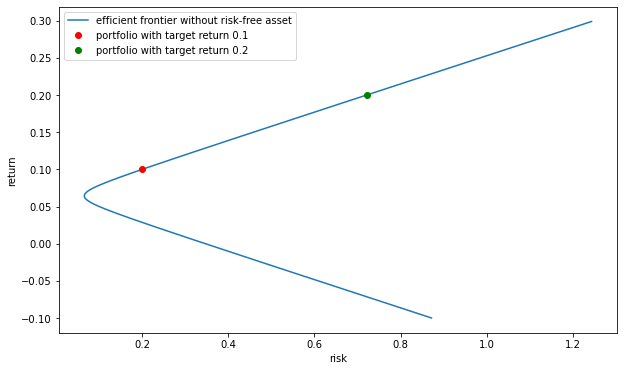

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))

# efficient frontier without risk-free asset
rets1 = np.arange(-0.1, 0.3, 0.001)
risk1 = np.zeros(len(rets1))

for i,j in enumerate(rets1):
    port = mkt_port(n, mu, sig, mu_0=j)
    var = np.dot(np.dot(port.T, sig),port)
    risk1[i] = np.sqrt(var)
    
ax.plot(risk1, rets1, label='efficient frontier without risk-free asset')
ax.plot(riskp1, 0.1, 'ro',label='portfolio with target return 0.1')
ax.plot(riskp2, 0.2, 'ro', color='green',label = 'portfolio with target return 0.2')
plt.xlabel('risk')
plt.ylabel('return')
plt.legend()
plt.savefig("p1_result")
plt.show()

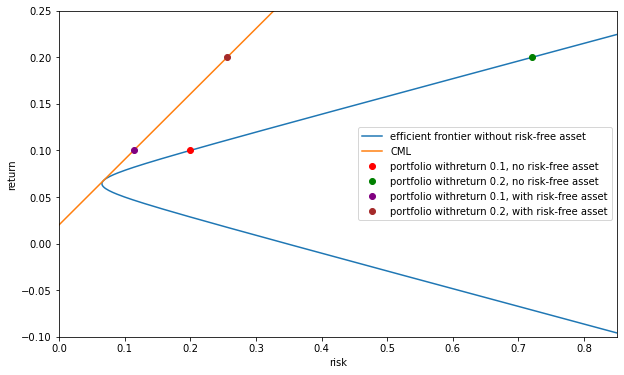

In [106]:
fig, ax = plt.subplots(figsize=(10, 6))

# efficient frontier without risk-free asset
rets1 = np.arange(-0.1, 0.3, 0.001)
risk1 = np.zeros(len(rets1))

for i,j in enumerate(rets1):
    port = mkt_port(n, mu, sig, j)
    var = np.dot(np.dot(port.T, sig),port)
    risk1[i] = np.sqrt(var)
ax.plot(risk1, rets1, label='efficient frontier without risk-free asset')

# new frontier
rets2 = np.arange(0.02, 0.3, 0.001)
risk2 = np.zeros(len(rets2))

for i,j in enumerate(rets2):
    port = mkt_port(n, mu, sig, j, 0.02)
    var = np.dot(np.dot(port.T, sig),port)
    risk2[i] = np.sqrt(var)

ax.plot(risk2, rets2, label='CML')
ax.plot(riskp1, 0.1, 'ro',label='portfolio withreturn 0.1, no risk-free asset')
ax.plot(riskp2, 0.2, 'ro', color='green',label = 'portfolio withreturn 0.2, no risk-free asset')
ax.plot(riskp3, 0.1, 'ro',color='purple',label='portfolio withreturn 0.1, with risk-free asset')
ax.plot(riskp4, 0.2, 'ro', color='brown',label = 'portfolio withreturn 0.2, with risk-free asset')
plt.ylim([-0.1, 0.25])
plt.xlim([0,0.85])
plt.xlabel('risk')
plt.ylabel('return')
plt.legend()
plt.savefig("p2_result")
plt.show()

# Problem 2

In [107]:
raw = pd.read_csv("./all_stocks_5yr.csv")
raw['date'] = pd.to_datetime(raw['date'])
raw.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [108]:
stocks = set(raw['Name'])

In [109]:
info = ['date', 'close']
df = raw[raw['Name']=='AAPL'][info]
df = pd.DataFrame(df)
cols = ['date', 'AAPL']
for s in stocks:
    df_s = raw[raw['Name']==s][info]
    df_s.name = s
    df = df.merge(df_s, on='date', how='outer')
    cols.append(s)
df.columns = cols
df = df.set_index('date')
df.head()

,AAPL,MOS,SPG,CMCSA,AZO,AAL,UHS,PHM,SJM,INFO,...,UDR,PDCO,PCAR,FCX,TJX,ITW,O,WYNN,ALLE,HES
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,67.8542,61.40,162.76,19.375,385.89,14.75,58.11,19.47,89.16,NaN,...,23.60,37.31,47.50,35.64,45.68,62.72,43.20,126.52,NaN,67.37
2013-02-11,68.5614,61.14,163.50,19.320,385.23,14.46,57.38,19.30,88.75,NaN,...,23.81,37.07,47.79,35.33,45.40,62.80,43.63,124.10,NaN,66.74
2013-02-12,66.8428,61.49,162.97,19.485,382.09,14.27,56.30,20.32,90.92,NaN,...,24.17,37.34,47.93,35.67,45.20,63.02,44.50,122.67,NaN,66.98
2013-02-13,66.7156,62.20,162.05,20.065,379.73,14.66,57.28,20.23,90.33,NaN,...,24.30,37.15,48.04,35.64,45.01,63.55,44.55,122.40,NaN,67.96
2013-02-14,66.6556,61.98,160.57,20.170,373.61,13.99,57.91,20.27,92.16,NaN,...,24.32,37.08,48.17,35.53,45.21,63.70,44.29,123.20,NaN,68.35


In [110]:
df = np.log(df/df.shift(1))
df.head()

,AAPL,MOS,SPG,CMCSA,AZO,AAL,UHS,PHM,SJM,INFO,...,UDR,PDCO,PCAR,FCX,TJX,ITW,O,WYNN,ALLE,HES
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,0.010368,-0.004244,0.004536,-0.002843,-0.001712,-0.019857,-0.012642,-0.008770,-0.004609,NaN,...,0.008859,-0.006453,0.006087,-0.008736,-0.006148,0.001275,0.009904,-0.019313,NaN,-0.009395
2013-02-12,-0.025386,0.005708,-0.003247,0.008504,-0.008184,-0.013227,-0.019001,0.051501,0.024157,NaN,...,0.015007,0.007257,0.002925,0.009578,-0.004415,0.003497,0.019744,-0.011590,NaN,0.003590
2013-02-13,-0.001905,0.011480,-0.005661,0.029332,-0.006196,0.026963,0.017257,-0.004439,-0.006510,NaN,...,0.005364,-0.005101,0.002292,-0.000841,-0.004212,0.008375,0.001123,-0.002203,NaN,0.014525
2013-02-14,-0.000900,-0.003543,-0.009175,0.005219,-0.016248,-0.046780,0.010939,0.001975,0.020057,NaN,...,0.000823,-0.001886,0.002702,-0.003091,0.004434,0.002358,-0.005853,0.006515,NaN,0.005722


## Select stocks

In [111]:
train = df[df.index < pd.Timestamp('2017')]
tmp = train.var()
tmp = tmp.sort_values().dropna()
largest = tmp[:10].index
lowest = tmp[-10:].index
selected = largest.union(lowest)

In [112]:
# stocks
data = train[selected]
data.columns

Index(['AMD', 'BRK.B', 'CHK', 'EBAY', 'FCX', 'INCY', 'JNJ', 'KO', 'LNT', 'MCD',
       'NI', 'PEP', 'PG', 'QRVO', 'RSG', 'SO', 'T', 'VRTX', 'WM', 'WMB'],
      dtype='object')

In [113]:
# generate return vector and cov matrix
mu = data.mean()
mu = np.array(mu)
sig = data.cov()
sig = np.matrix(sig)

In [114]:
# solve for min var portfolio
min_port = mkt_port(len(mu), mu, sig, mu_0=0, rf=0)
test_data = df[df.index > pd.Timestamp('2017')][selected]

In [115]:
min_port

matrix([[-0.00290296],
        [ 0.00750625],
        [ 0.01507263],
        [ 0.00718344],
        [-0.01605077],
        [ 0.00290581],
        [ 0.11313886],
        [ 0.05731676],
        [-0.0012722 ],
        [ 0.16128354],
        [-0.00444053],
        [ 0.04843373],
        [ 0.10379265],
        [-0.01542187],
        [ 0.10298377],
        [ 0.14134805],
        [ 0.14065221],
        [-0.00916391],
        [ 0.15550895],
        [-0.0078744 ]])

Calculate the return of portfolio

In [116]:
test_matrix = np.matrix(test_data)
path1 = test_matrix.dot(min_port)

[*********************100%***********************]  1 of 1 completed


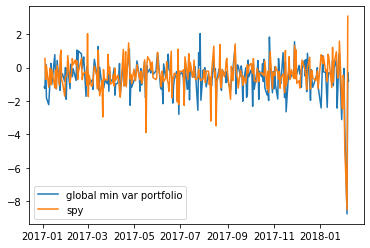

In [117]:
import yfinance as yf
date = test_data.index
spy = yf.download('spy', date[0],date[-1]).Close
spy = np.log(spy/spy.shift(1)).dropna()
rf = 0.003
path1 = path1 - rf
path1 = path1/np.std(path1)
spy = spy - rf
spy = spy/np.std(spy)

plt.plot(date,path1,label='global min var portfolio')
plt.plot(spy, label = 'spy')
plt.legend()
plt.savefig("p2_part1")
plt.show()

$$
\begin{array}{ll}
\operatorname{minimize} & (1 / 2) x^{T} P x+q^{T} x \\
\text { subject to } & G x \preceq h \\
& A x=b
\end{array}
$$

$$  G_{n \times n} =
  \begin{bmatrix}
    -1 & & \\
    & \ddots & \\
    & & -1
  \end{bmatrix}$$
  
$$
h = (-0.0001, -0.0001 \cdots -0.0001)^{T}
$$

In [118]:
# solve for portfolio with extra constraints
n = len(mu)
A = matrix(1.0, (1,n))
b = matrix(1.0)
q = matrix(0.0, (n, 1))
Sig = matrix(sig)
tmp = np.array([-1.0]*n)
G = matrix(np.diag(tmp))
h = matrix(-0.0001,(n,1))

In [119]:
port = qp(Sig, q, G, h, A, b)['x']

     pcost       dcost       gap    pres   dres
 0:  5.4040e-05 -9.9802e-01  1e+00  2e-16  5e+00
 1:  5.4031e-05 -1.0000e-02  1e-02  1e-16  5e-02
 2:  5.3116e-05 -1.1911e-04  2e-04  4e-17  8e-04
 3:  3.4360e-05  1.8172e-06  3e-05  4e-17  1e-04
 4:  2.3775e-05  1.4643e-05  9e-06  1e-16  7e-20
 5:  2.1656e-05  2.0536e-05  1e-06  9e-17  5e-20
 6:  2.1169e-05  2.1051e-05  1e-07  7e-17  3e-20
 7:  2.1098e-05  2.1093e-05  6e-09  4e-17  2e-20
Optimal solution found.


In [120]:
print(port, np.sum(port))

[ 1.49e-04]
[ 7.31e-04]
[ 3.82e-03]
[ 3.73e-03]
[ 1.09e-04]
[ 3.25e-04]
[ 1.01e-01]
[ 5.51e-02]
[ 4.88e-04]
[ 1.57e-01]
[ 2.18e-04]
[ 4.87e-02]
[ 9.09e-02]
[ 1.10e-04]
[ 9.60e-02]
[ 1.61e-01]
[ 1.35e-01]
[ 1.26e-04]
[ 1.46e-01]
[ 1.24e-04]
 1.0


We can find that all data is > 0.0001 and sum up to 1

In [121]:
test_matrix = np.matrix(test_data)
path2 = test_matrix.dot(port)

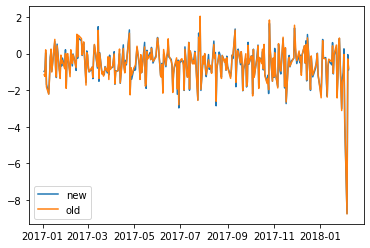

In [122]:
rf = 0.003
path2 = path2 - rf
path2 = path2/np.std(path2)
spy = spy - rf
spy = spy/np.std(spy)

plt.plot(date,path2,label='new')
plt.plot(date, path1, label = 'old')
plt.legend()
plt.savefig("p2_part2")
plt.show()